# Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.02208328, -0.08768963],
       [ 0.60750718, -0.36499232],
       [-0.63881588, -0.46254743],
       ...,
       [ 1.30145058,  1.44437146],
       [-1.90105184, -1.23200375],
       [ 1.33668138, -1.46269056]])

In [5]:
y

array([-9.17881213e+00,  3.66743333e+00, -5.09842284e+01, -7.96652653e+01,
        3.90948976e+01,  1.92409675e+01, -1.62597536e+01, -6.62804867e+01,
       -2.17489438e+01, -2.41075418e+01,  1.09371403e+01,  5.80199443e+00,
       -6.20419391e+01, -7.66487210e+01, -7.55951381e+01, -5.32973530e+01,
       -7.88197837e+01, -2.31404314e+01,  6.84319197e+01,  1.08339096e+01,
        1.53189742e+02,  4.45950553e+01,  3.27868672e+01, -6.47812826e+01,
        6.93050273e+01, -1.78578660e+01,  3.91438770e+01,  6.84565728e+01,
        2.48378033e+01, -8.16831191e+01, -2.27830583e+01, -9.37239845e+01,
       -4.82613315e+01,  3.53958136e-01,  1.22809379e+02,  5.88901645e+01,
        3.68339091e+00,  1.21595957e+02, -1.09903206e+02, -3.58799153e+01,
        5.16757160e+01,  1.55370576e+01, -1.67375593e+01,  1.32421507e+01,
       -2.80050040e+01, -7.54104382e+01, -7.33732003e+01,  2.44302262e+01,
       -4.68918863e+01, -1.08803957e+02,  6.14679326e+01,  9.43231391e+01,
        7.99682799e+01, -

In [6]:
pd.DataFrame(X)[0]

0     -0.022083
1      0.607507
2     -0.638816
3     -0.802164
4      1.615257
         ...   
995    1.537935
996    0.801035
997    1.301451
998   -1.901052
999    1.336681
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

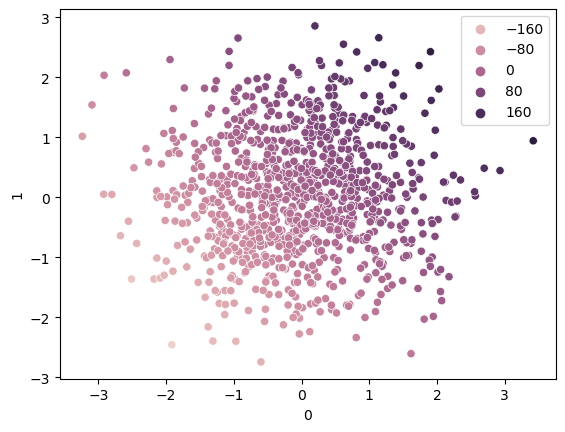

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[48.13870161, 45.09822777]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([  98.00347266,   74.22601753,   22.41743598,    0.73035823,
         82.78133278,   -1.52829812,  -80.18411576,  -44.30713525,
          4.05731059,   -7.45343721,  -32.46679103, -131.28136208,
         45.67142484,  -51.9511088 ,   18.28671994,  -37.13821725,
        -13.07590215,  -76.28689131,   89.21614531,   12.29978022,
         26.26163205,   40.47569546,   -5.93201048,  -47.31283049,
         52.59532344,  -75.76331909,  -90.64448702,  -29.87783517,
         65.95618819,  -65.96040868,   72.01264958,   -4.67574806,
        -13.36794122,  -36.61672094,  -68.26068741,   15.63945614,
        -51.22411226,  -44.61203921,   21.89959154,  -24.48031943,
        -40.54691593,  -40.730832  ,   39.75868091,  -56.24849001,
        -92.01320287,   -9.36942945,  101.48247832,  -62.55358801,
         -0.42448805,   -8.72357576,   65.98601084,  -10.57723631,
        -47.75510947,  -86.37724836,   48.57718321,   55.2817955 ,
         -6.41242554,  103.26922359,  -25.70049795,   34.52633

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9978427799287765


## Hyperparametere Tuning With SVR


In [17]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.921 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.919 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.931 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.922 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.921 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.926 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.919 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9979018459870659
